In [186]:
import numpy as np
from qiskit import QuantumCircuit
import math

# input your two numbers here
num1 = 2
num2 = 8


In [180]:
num_size = 0

if math.ceil(math.log2(num1)) > math.ceil(math.log2(num2)):
    num_size = math.ceil(math.log2(num1))
    if math.log2(num1).is_integer():
        num_size = num_size + 1
else:
    num_size = math.ceil(math.log2(num2))
    if math.log2(num2).is_integer():
        num_size = num_size + 1
    
num1 = "{0:b}".format(num1)[::-1]
num2 = "{0:b}".format(num2)[::-1]

circuit_size = num_size*2 + (num_size + 1)

qc = QuantumCircuit(circuit_size)

for i in range(num_size):
    if (len(num1) > i and num1[i] == '1'):
        qc.x(i)
    if (len(num2) > i and num2[i] == '1'):
        qc.x(i + num_size)
    

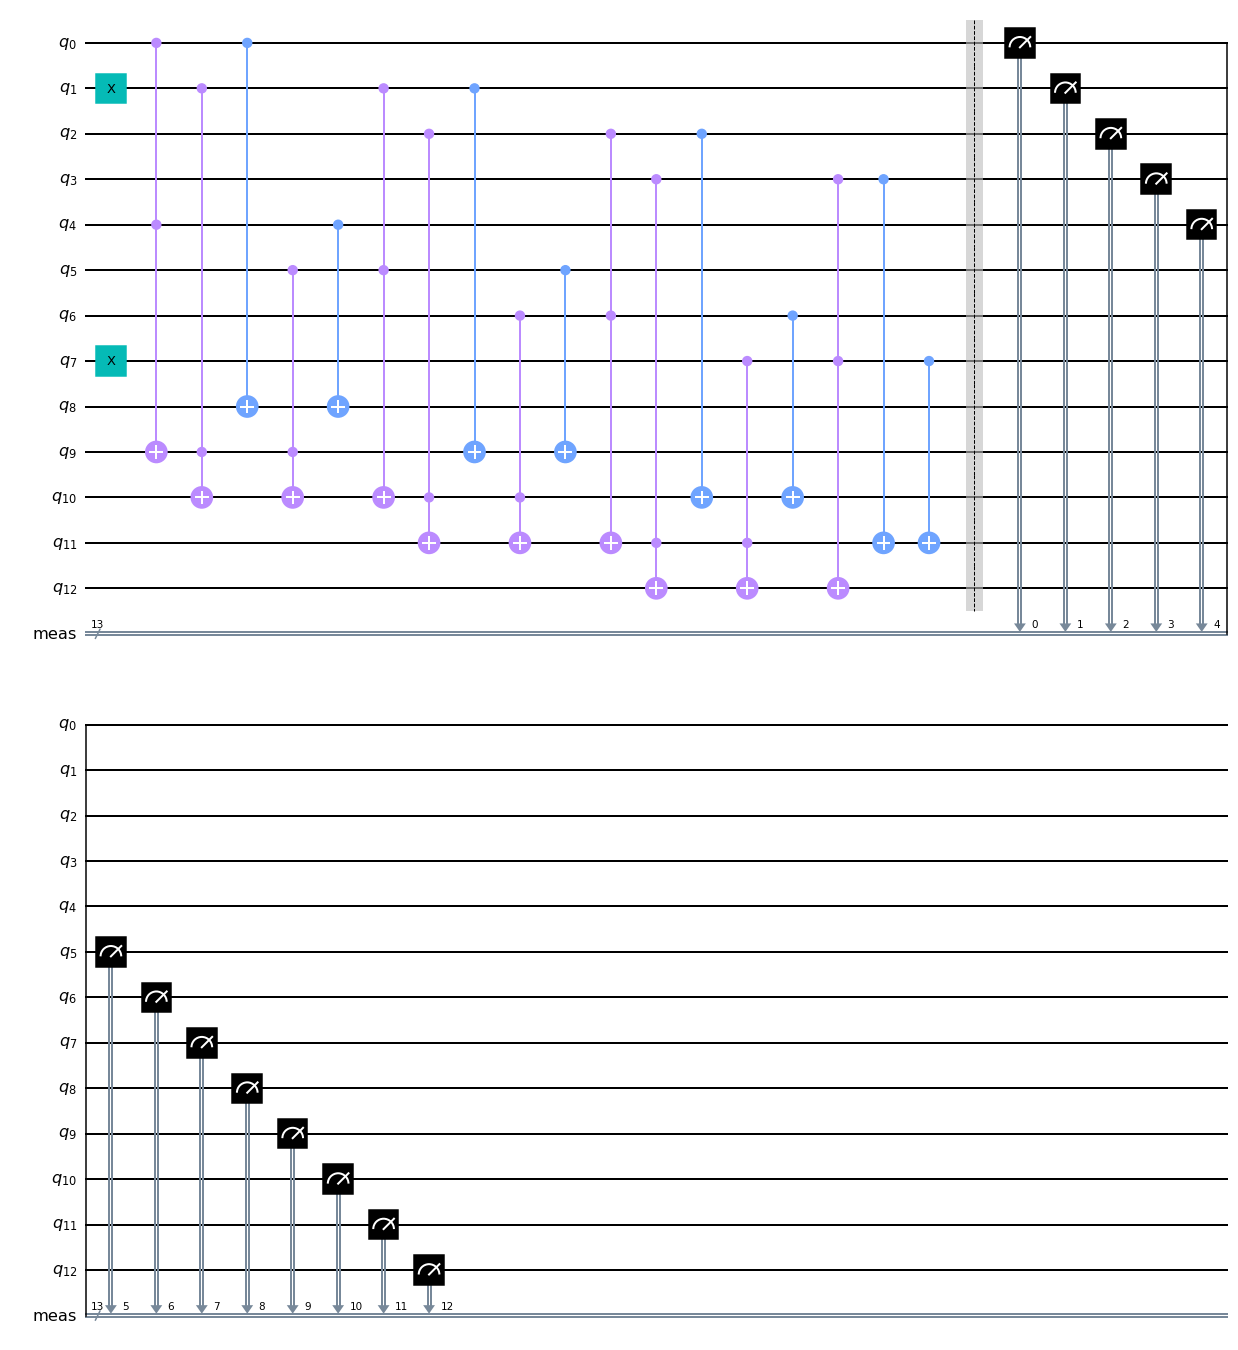

In [181]:


for i in range(num_size):
    qc.ccx(i, i + num_size, i + num_size*2 + 1)
    
    if i + 1 < num_size:
        qc.ccx(i + 1, i + num_size*2 + 1,i + num_size*2 + 2)
        qc.ccx(i + num_size + 1, i + num_size*2 + 1,i + num_size*2 + 2)
    
    

for i in range(num_size):
    qc.cx(i, i + num_size*2)
    qc.cx(i + num_size, i + num_size*2)

#qc.cx(1,2)
#qc.cx(0,2)

#qc.ccx(0,1,3)
qc.measure_all()
qc.draw('mpl')

In [182]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile

# Use AerSimulator
from qiskit.providers.aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [183]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'0101010000010': 1024}


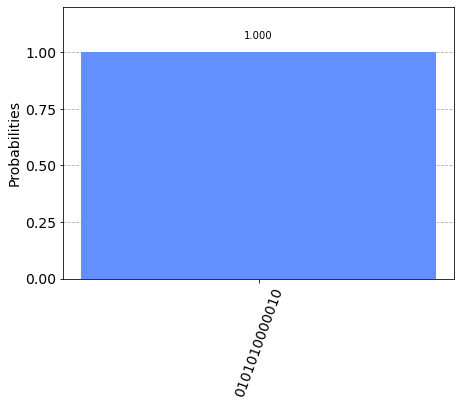

In [184]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)